In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [6]:
location = "kc_house_data.csv"
df = pd.read_csv(location)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(df)

               id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0         3       1.00   
1      6414100192  20141209T000000   538000.0         3       2.25   
2      5631500400  20150225T000000   180000.0         2       1.00   
3      2487200875  20141209T000000   604000.0         4       3.00   
4      1954400510  20150218T000000   510000.0         3       2.00   
5      7237550310  20140512T000000  1225000.0         4       4.50   
6      1321400060  20140627T000000   257500.0         3       2.25   
7      2008000270  20150115T000000   291850.0         3       1.50   
8      2414600126  20150415T000000   229500.0         3       1.00   
9      3793500160  20150312T000000   323000.0         3       2.50   
10     1736800520  20150403T000000   662500.0         3       2.50   
11     9212900260  20140527T000000   468000.0         2       1.00   
12      114101516  20140528T000000   310000.0         3       1.00   
13     6054650070  2

In [10]:
dupe = df.duplicated()
df[dupe]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

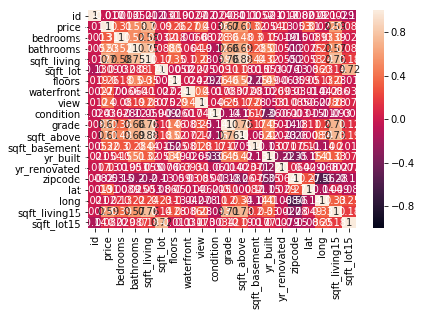

In [19]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

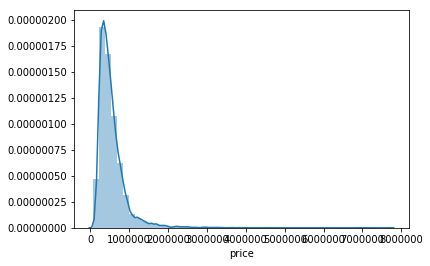

In [21]:
sns.distplot(df["price"])

In [28]:
meanprice = df['price'].mean()
stdprice = df['price'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf = df.copy() #to not mess up the original df
copydf = copydf.drop(copydf[copydf['price'] > toprange].index)
copydf = copydf.drop(copydf[copydf['price'] < botrange].index)

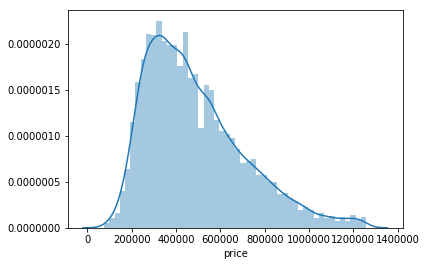

In [29]:
sns.distplot(copydf["price"])

In [33]:
df2= copydf[['price','bedrooms','bathrooms','condition','sqft_living','zipcode',]]

In [34]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'condition', 'sqft_living',
       'zipcode'],
      dtype='object')

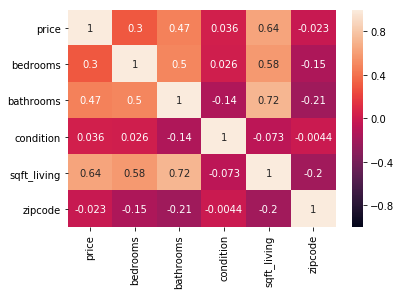

In [35]:
corr2 = df2.corr()

sns.heatmap(corr2, vmin=-1, annot=True)

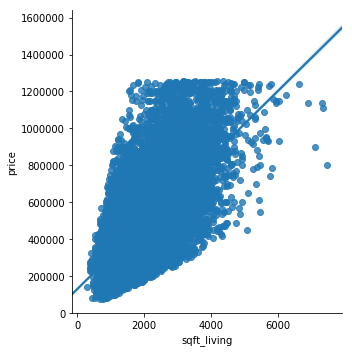

In [37]:
sns.lmplot(x='sqft_living', y='price', data=df2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


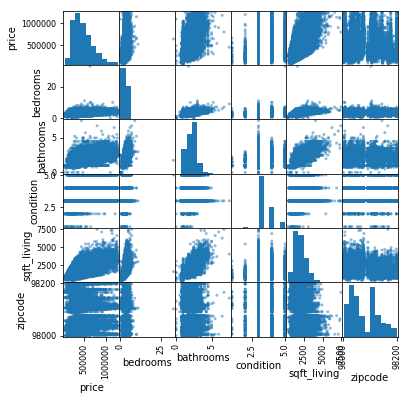

In [38]:
pd.scatter_matrix(df2, figsize=(6, 6))
plt.show()

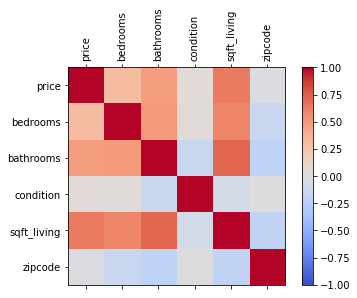

In [44]:
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

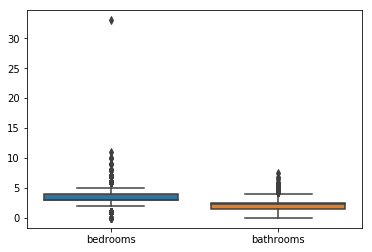

In [48]:
dfr=df2[["bedrooms","bathrooms",]]
sns.boxplot(data=dfr)

In [52]:
pd.pivot_table(df2,
               index= ["sqft_living"],
               columns=["bedrooms",'bathrooms'],
               aggfunc=[np.mean],
               values=["price"],
               fill_value = 0,
               margins =True,
               dropna=True,
            
               
              )

mean                                               \
                     price                                                
bedrooms                 0                                                
bathrooms              0.0      0.75       1.0       1.5            2.5   
sqft_living                                                               
290          142000.000000       0.0       0.0       0.0       0.000000   
370               0.000000       0.0       0.0       0.0       0.000000   
380               0.000000       0.0       0.0       0.0       0.000000   
384               0.000000  265000.0       0.0       0.0       0.000000   
390               0.000000       0.0  228000.0       0.0       0.000000   
410               0.000000       0.0       0.0       0.0       0.000000   
420               0.000000       0.0       0.0       0.0       0.000000   
430               0.000000       0.0       0.0       0.0       0.000000   
440               0.000000       0.0       0.0       0.0       0.000000   
460               0.000000       0.0       0.0       0.0       0.000000   
470               0.000000       0.0       0.0       0.0       0.000000   
480               0.000000       0.0       0.0       0.0       0.000000   
490               0.000000       0.0       0.0       0.0       0.000000   
500               0.000000       0.0       0.0       0.0       0.000000   
520               0.000000       0.0       0.0       0.0       0.000000   
530               0.000000       0.0       0.0       0.0       0.000000   
540               0.000000       0.0       0.0       0.0       0.000000   
550               0.000000       0.0       0.0       0.0       0.000000   
560               0.000000       0.0       0.0       0.0       0.000000   
570               0.000000       0.0       0.0       0.0       0.000000   
580               0.000000       0.0       0.0       0.0       0.000000   
590               0.000000       0.0       0.0       0.0       0.000000   
600               0.000000       0.0       0.0       0.0       0.000000   
610               0.000000       0.0       0.0       0.0       0.000000   
620               0.000000       0.0       0.0       0.0       0.000000   
630               0.000000       0.0       0.0       0.0       0.000000   
640               0.000000       0.0       0.0       0.0       0.000000   
650               0.000000       0.0       0.0       0.0       0.000000   
660               0.000000       0.0       0.0       0.0       0.000000   
670               0.000000       0.0       0.0       0.0       0.000000   
...                    ...       ...       ...       ...            ...   
5430              0.000000       0.0       0.0       0.0       0.000000   
5440              0.000000       0.0       0.0       0.0       0.000000   
5450              0.000000       0.0       0.0       0.0       0.000000   
5461              0.000000       0.0       0.0       0.0       0.000000   
5470              0.000000       0.0       0.0       0.0       0.000000   
5480              0.000000       0.0       0.0       0.0       0.000000   
5545              0.000000       0.0       0.0       0.0       0.000000   
5600              0.000000       0.0       0.0       0.0       0.000000   
5610              0.000000       0.0       0.0       0.0       0.000000   
5635              0.000000       0.0       0.0       0.0       0.000000   
5660              0.000000       0.0       0.0       0.0       0.000000   
5670              0.000000       0.0       0.0       0.0       0.000000   
5710              0.000000       0.0       0.0       0.0       0.000000   
5730              0.000000       0.0       0.0       0.0       0.000000   
5774              0.000000       0.0       0.0       0.0       0.000000   
5790              0.000000       0.0       0.0       0.0       0.000000   
5820              0.000000       0.0       0.0       0.0       0.000000   
5860              0.000000       0.0       0.0 

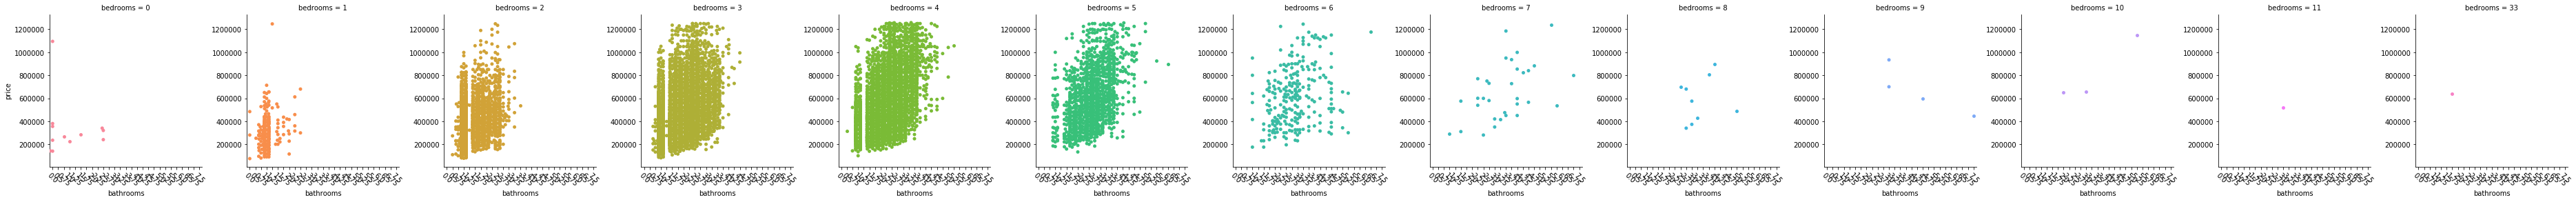

In [57]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='bathrooms', y="price",
                   data=df2,
                   hue='bedrooms', 
                   col='bedrooms',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

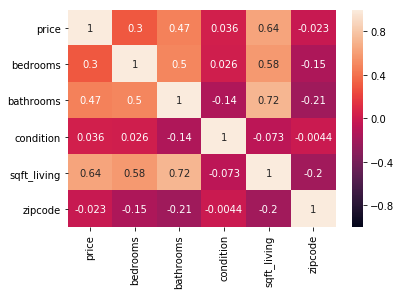

In [58]:
corr2 = df2.corr()

sns.heatmap(corr2, vmin=-1, annot=True)

In [60]:
import statsmodels.formula.api as smf
result = smf.ols('price ~ bedrooms + bathrooms + sqft_living', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7405.
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:38:06   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.485e+04   6913.667     10.826      0.000    6.13e+04    8.84e+04
bedrooms    -5.786e+04   2334.607    -24.784      0.000   -6.24e+04   -5.33e+04
bathrooms    7932.7122   3510.556      2.260      0.024    1051.764    1.48e+04
sqft_living   309.3924      3.087    100.231      0.000     303.342     315.443
==============================================================================
Omnibus:                    14449.284   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494615.261
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.787   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
result = smf.ols('price ~ bedrooms + bathrooms + sqft_living -1', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 3.877e+04
Date:                Sat, 02 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:39:08   Log-Likelihood:            -3.0002e+05
No. Observations:               21613   AIC:                         6.000e+05
Df Residuals:                   21610   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms      -4.1e+04   1743.911    -23.511      0.000   -4.44e+04   -3.76e+04
bathrooms    1.918e+04   3362.389      5.703      0.000    1.26e+04    2.58e+04
sqft_living   304.3053      3.059     99.479      0.000     298.309     310.301
==============================================================================
Omnibus:                    13762.550   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           435777.129
Skew:                           2.571   Prob(JB):                         0.00
Kurtosis:                      24.389   Cond. No.                     4.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""